In [105]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# read in KSI data
df_all = pd.read_csv('../KSI.csv')

# pre-processing/remove vehicles from discussion for now
peds = ['Cyclist','Cyclist Passenger', 'In-Line Skater', 'Pedestrian', 'Wheelchair']
df = df_all[df_all.invtype.isin(peds)]

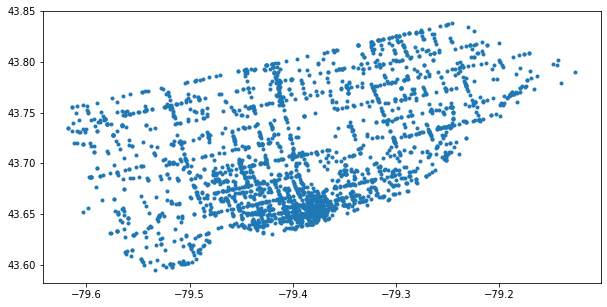

In [107]:
# plot x,y just to see a before image
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df.x, df.y, marker='.', linestyle='None')
plt.show()

In [108]:
# re-scale to make computation better
from sklearn.preprocessing import scale
dx = scale(df.x)
dy = scale(df.y)

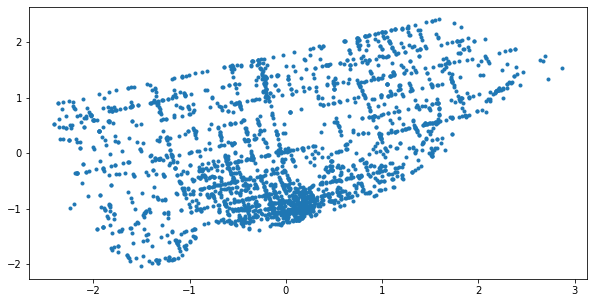

In [109]:
# check out the rescaling to make sure nothing funky has occurred
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(dx, dy, marker='.', linestyle='None')
plt.show()

In [110]:
# put points in correct format for DBSCAN
X = np.array([[x,y]  for x, y in zip(dx, dy)])

Clustering that has been tried:

eps = 0.05 (makes for good clusters outside of the downtown core, but only one cluster downtown, this corresponds to about 500m)

In [293]:
# begin clustering, and eps of 0.1~1.04km. So 500 m is roughly 0.05
db = DBSCAN(eps=0.05, min_samples=3).fit(X)
pd.Series(db.labels_).nunique()

229

In [294]:
result = pd.DataFrame({'x':df.x,'y':df.y,'cluster':db.labels_})
result['noise'] = result.cluster == -1

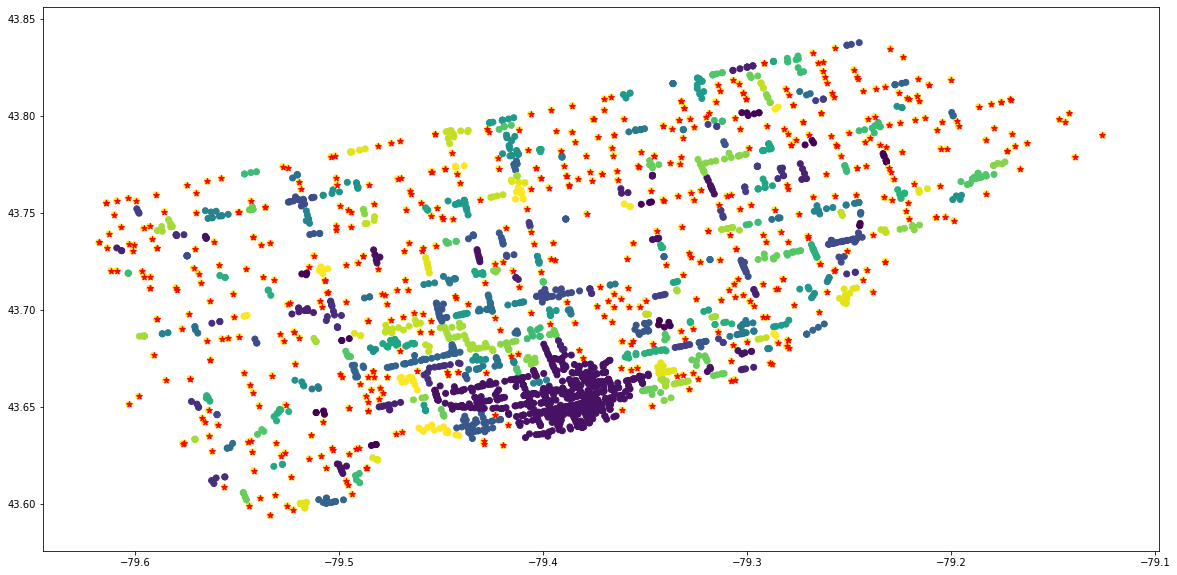

In [295]:
# plot the result for all of TO
fig, ax1 = plt.subplots(1, 1, figsize=(20,10), sharex=True, sharey=True)
colors = [int(i % 23) for i in db.labels_]
ax1.scatter(result.x, result.y, c=colors)
ax1.scatter(result.x[result.cluster ==-1], result.y[result.cluster==-1], marker='*', color='r')

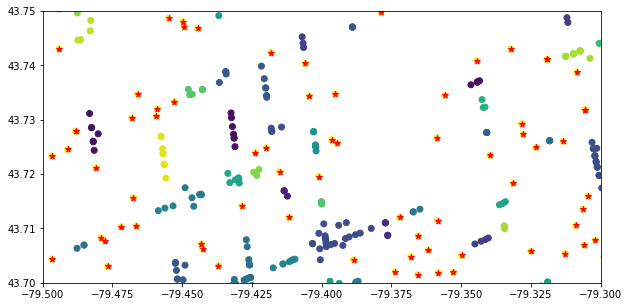

In [296]:
# plot the result for north of downtown
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([-79.5,-79.3])
ax.set_ylim([43.70,43.75])
colors = [int(i % 23) for i in db.labels_]
ax.scatter(result.x, result.y, c=colors)
ax.scatter(result.x[result.cluster ==-1], result.y[result.cluster==-1], marker='*', color='r')

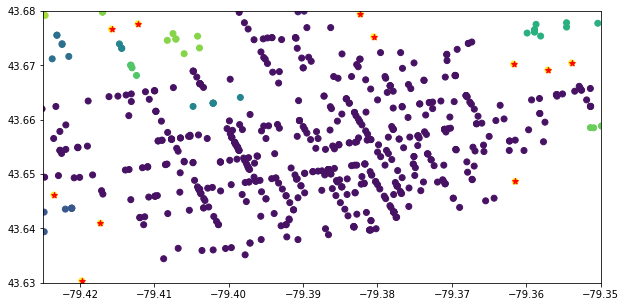

In [297]:
# plot the result
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([-79.425,-79.350])
ax.set_ylim([43.63,43.68])
colors = [int(i % 23) for i in db.labels_]
ax.scatter(result.x, result.y, c=colors)
ax.scatter(result.x[result.cluster ==-1], result.y[result.cluster==-1], marker='*', color='r')

In [324]:
# find the large downtown cluster
downtown = result.cluster.mode().values[0]

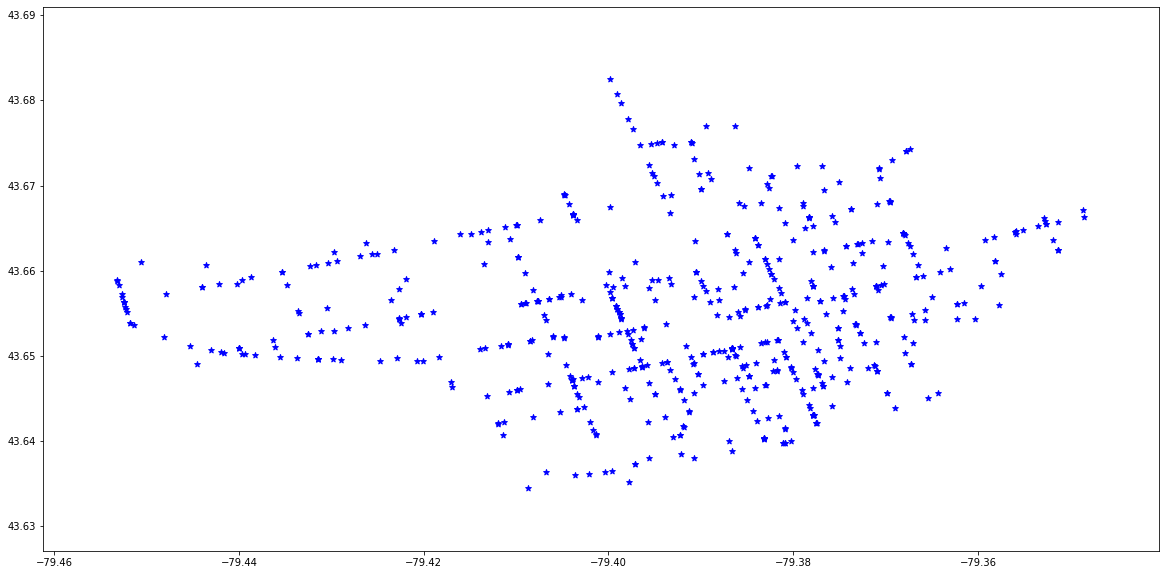

In [326]:
fig, ax = plt.subplots(1, 1, figsize=(20,10), sharex=True, sharey=True)
ax.scatter(result.x[result.cluster == downtown], 
           result.y[result.cluster == downtown], marker='*', color='b')
plt.show()

In [362]:
# redo the clustering for the downtown core, which is dealing with different densities and 
# should therefore have different minimum cluster members as well as eps'
dxr = scale(result.x[result.cluster == downtown])
dyr = scale(result.y[result.cluster == downtown])

# put points in correct format for DBSCAN
X = np.array([[x,y]  for x, y in zip(dxr, dyr)])

# begin clustering, scaling is off - I think in this case an eps of 0.075 is order 100m
db = DBSCAN(eps=0.075, min_samples=5).fit(X)
pd.Series(db.labels_).nunique()

31

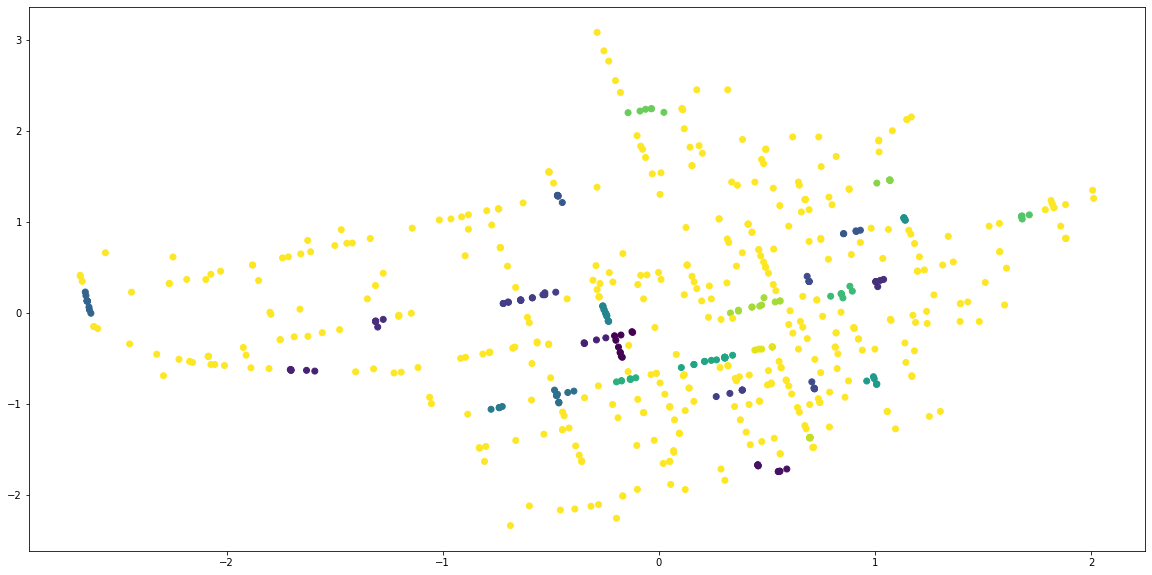

In [363]:
# plot the result
fig, ax1 = plt.subplots(1, 1, figsize=(20,10), sharex=True, sharey=True)
colors = [int(i % 23) for i in db.labels_]
ax1.scatter(dxr, dyr, c=colors)
#ax1.scatter(result.x[result.cluster == downtown], 
#            result.y[result.cluster == downtown], marker='*', color=)